### Here we have a dataset which are of any bank and our work is we have to make analysis on all the given features and predict weather the bank will give loan to that particular person or not. Now days its very important for bank to aware from frauds.

###  So on the basis the important features banks will decide weather approving loan to any particular person is safe for them or not , after the whole process get over banks have a surity in their hands.

###  So lets deal with this dataset , this is a classification dataset and we are using Logistic Regression Algorithem for this dataset. 

#### The main function work behind the algorithem is sigmoid function 

### Sigmoid = (1/1+e*-z)

### This Algo classify the target column it means we get a result in the form of weather [Yes or no] in Computers language weather 0 or 1 
#### 0 == Negative 
#### 1 == Positive 

### Importing Required Dependencies

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 


In [18]:
df=pd.read_csv(r'F:\pandas_dataset\loan_data_set.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


### With isna().sum() we get the sum of all the null values from all the columns 

In [20]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [21]:
df.isnull()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,False,False,False,False,False,False,False,False,False,False,False,False,False
610,False,False,False,False,False,False,False,False,False,False,False,False,False
611,False,False,False,False,False,False,False,False,False,False,False,False,False
612,False,False,False,False,False,False,False,False,False,False,False,False,False


In [22]:
d1=df.corr()
d1

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


## Heatmap 

<AxesSubplot:>

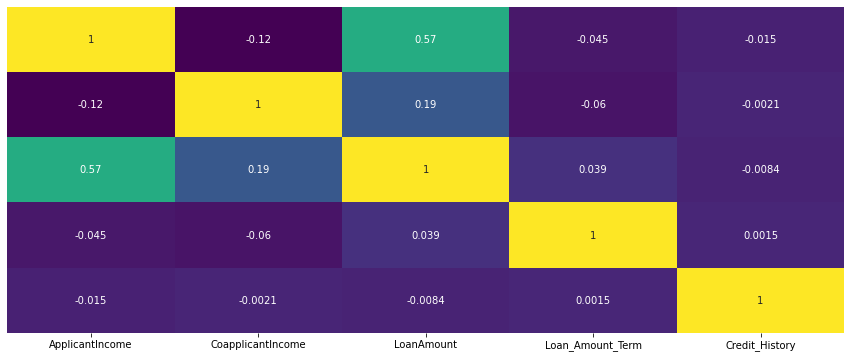

In [23]:
plt.figure(figsize=(15,6))
sns.heatmap(data=d1,yticklabels=False,cbar=False,annot=True,cmap='viridis')

In [24]:
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


### Fill all and drop some null values of columns.
### If the column is numerical fill with Central Tendency. 
### If column is catagorical fill with mode. It is not the proven theory it depend on the data but here we apply this method to fill the null values of dataset. 

In [25]:
from scipy.stats import stats

In [26]:
a=(df['Gender'].value_counts())
a

Male      489
Female    112
Name: Gender, dtype: int64

In [27]:
df['Gender'].fillna('Male',inplace=True)

In [28]:
df['Gender'].value_counts()
# fill nan vlaues with male name 

Male      502
Female    112
Name: Gender, dtype: int64

In [29]:
df['Married'].dropna(inplace=True)

In [30]:
df['Married'].fillna('Yes',inplace=True)

In [31]:
df['Married'].value_counts()

Yes    401
No     213
Name: Married, dtype: int64

In [32]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [33]:
df['Dependents'].replace({'3+':'3'},inplace=True)

In [34]:
df['Dependents'].value_counts()

0    345
1    102
2    101
3     51
Name: Dependents, dtype: int64

C:\Users\91978\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Dependents', ylabel='Density'>

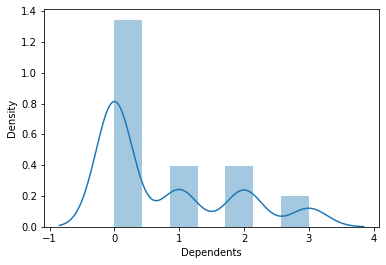

In [35]:
sns.distplot(df['Dependents'])

In [36]:
df['Dependents'].fillna('0',inplace=True)

In [37]:
df.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [38]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [39]:
df['Self_Employed'].fillna('No',inplace=True)

In [40]:
df.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [41]:
df['LoanAmount'].value_counts()

120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: LoanAmount, Length: 203, dtype: int64

C:\Users\91978\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

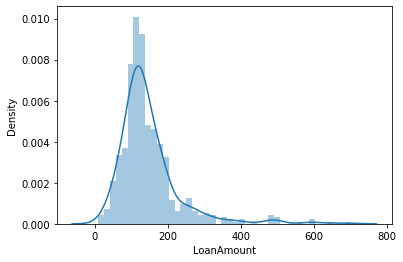

In [42]:
sns.distplot(df['LoanAmount'])

In [43]:
df.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [44]:
df['LoanAmount'].fillna((df['LoanAmount'].mean()),inplace=True)

In [45]:
df['LoanAmount'].value_counts()

146.412162    22
120.000000    20
110.000000    17
100.000000    15
160.000000    12
              ..
240.000000     1
214.000000     1
59.000000      1
166.000000     1
253.000000     1
Name: LoanAmount, Length: 204, dtype: int64

In [46]:
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

C:\Users\91978\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

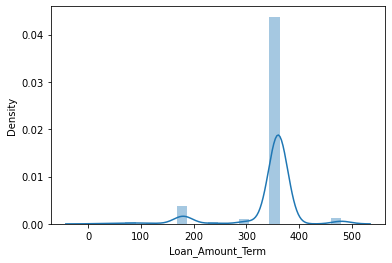

In [47]:
sns.distplot(df['Loan_Amount_Term'])

In [48]:
df['Loan_Amount_Term'].fillna(360,inplace=True)

In [49]:
df.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [50]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [51]:
df['Credit_History'].fillna(1,inplace=True)

In [52]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## _Label Encoding of sum features_

In [53]:
from sklearn.preprocessing import LabelEncoder

In [54]:
le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])

In [55]:
# convert string with 0 and 1 with help of loop
a=['Married','Self_Employed','Education','Loan_Status']

for i in a:
    df[i]=le.fit_transform(df[i])

In [56]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,Urban,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,Rural,0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,Urban,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,Urban,1
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,Rural,1
610,LP002979,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,Rural,1
611,LP002983,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,Urban,1
612,LP002984,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,Urban,1


In [57]:
property_area=pd.get_dummies(df['Property_Area'],drop_first=True)

In [58]:
df=pd.concat([df,property_area],axis=1)

In [59]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Semiurban,Urban
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,Urban,1,0,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,Rural,0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,Urban,1,0,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,Urban,1,0,1
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,Urban,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,Rural,1,0,0
610,LP002979,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,Rural,1,0,0
611,LP002983,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,Urban,1,0,1
612,LP002984,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,Urban,1,0,1


In [60]:
df.drop('Property_Area',axis=1,inplace=True)

In [61]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Semiurban,Urban
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,1,0,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,1,0,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,1,0,1
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,1,0,0
610,LP002979,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,1,0,0
611,LP002983,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,1,0,1
612,LP002984,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,1,0,1


## _Divided data into X and Y to apply Train Test and Split the data into training and testing_ 

In [62]:
x=df.drop(['Loan_Status','Loan_ID'],axis=1)
y=df['Loan_Status']

In [63]:
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Semiurban,Urban
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,0,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,0,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,0,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,0
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,0
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,0,1
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,0,1


In [64]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int32

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=105)

In [67]:
x_test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Semiurban,Urban
232,1,0,0,1,0,3189,2598.0,120.000000,360.0,1.0,0,0
260,1,1,1,0,0,6083,4250.0,330.000000,360.0,1.0,0,1
564,1,1,2,0,0,8799,0.0,258.000000,360.0,0.0,0,1
123,1,1,2,0,0,2957,0.0,81.000000,360.0,1.0,1,0
403,0,0,0,1,0,1963,0.0,53.000000,360.0,1.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
601,1,1,0,1,0,2894,2792.0,155.000000,360.0,1.0,0,0
489,1,0,0,0,0,2435,0.0,75.000000,360.0,1.0,0,1
551,1,1,1,1,0,2492,2375.0,146.412162,360.0,1.0,0,0
252,1,0,0,1,1,2583,2167.0,104.000000,360.0,1.0,0,0


## Model Building LogisticRegression

In [68]:
from sklearn.linear_model import LogisticRegression

In [69]:
lr=LogisticRegression()

In [70]:
lr.fit(x_train,y_train)

C:\Users\91978\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [71]:
lr.score(x_train,y_train)

0.8135198135198135

In [72]:
lr.score(x_test,y_test)

0.8

In [73]:
y_pred=lr.predict(x_test)

In [74]:
from sklearn.metrics import classification_report

In [75]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.43      0.55        53
           1       0.81      0.95      0.87       132

    accuracy                           0.80       185
   macro avg       0.79      0.69      0.71       185
weighted avg       0.80      0.80      0.78       185



## We get the Good Accuracy with the Logistic Regression 

In [76]:
from sklearn.metrics import confusion_matrix

In [77]:
print(confusion_matrix(y_test,y_pred))

[[ 23  30]
 [  7 125]]


In [78]:
from sklearn.linear_model import SGDClassifier

In [79]:
sgd=SGDClassifier(alpha=0.000001,max_iter=1000000,penalty='l2')

In [80]:
sgd.fit(x_train,y_train)

SGDClassifier(alpha=1e-06, max_iter=1000000)

In [81]:
df1=x_test

In [82]:
df1['prediction']=y_pred

In [83]:
df1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Semiurban,Urban,prediction
232,1,0,0,1,0,3189,2598.0,120.000000,360.0,1.0,0,0,0
260,1,1,1,0,0,6083,4250.0,330.000000,360.0,1.0,0,1,1
564,1,1,2,0,0,8799,0.0,258.000000,360.0,0.0,0,1,0
123,1,1,2,0,0,2957,0.0,81.000000,360.0,1.0,1,0,1
403,0,0,0,1,0,1963,0.0,53.000000,360.0,1.0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
601,1,1,0,1,0,2894,2792.0,155.000000,360.0,1.0,0,0,1
489,1,0,0,0,0,2435,0.0,75.000000,360.0,1.0,0,1,1
551,1,1,1,1,0,2492,2375.0,146.412162,360.0,1.0,0,0,1
252,1,0,0,1,1,2583,2167.0,104.000000,360.0,1.0,0,0,1
